In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cleaning categorical data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/CURR-v3.X-MAR2023/UNIT4/DAY1/4.01 K-NN Model. Imputing missing values/HC4A_unit4_ver1.csv')

In [4]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,NaN,3712,XXXX,NaN,F,T2,3,NaN,479,...,NaN,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,NaN,5202,XXXX,NaN,M,S1,6,H,5468,...,NaN,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,NaN,0,XXXX,NaN,M,R2,3,U,497,...,NaN,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,NaN,2801,XXXX,NaN,F,R2,1,U,1000,...,NaN,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,NaN,2001,XXXX,X,F,S2,3,H,576,...,NaN,113,43,10,25,9702,L2F,37,14.0,6.864865


In [5]:
#watch out for categoricals like INCOME - may need to treat it as a categorical ordinal.
data['INCOME'].value_counts()

5    18321
4    17408
2    15586
3    13465
1     9304
6     9158
7     7327
Name: INCOME, dtype: int64

In [6]:
categoricals = data.select_dtypes([object])
categoricals.head()

,STATE,PVASTATE,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,VETERANS,RFA_2
0,IL,NaN,XXXX,NaN,F,T2,NaN,NaN,L4E
1,CA,NaN,XXXX,NaN,M,S1,H,NaN,L2G
2,NC,NaN,XXXX,NaN,M,R2,U,NaN,L4E
3,CA,NaN,XXXX,NaN,F,R2,U,NaN,L4E
4,FL,NaN,XXXX,X,F,S2,H,NaN,L2F


# NA's in categorical columns.

In [7]:
data.isna().sum()

STATE           0
PVASTATE    89184
DOB             0
MDMAUD          0
RECP3       88736
GENDER       2795
DOMAIN       2176
INCOME          0
HOMEOWNR    21051
HV1             0
HV2             0
HV3             0
HV4             0
IC1             0
IC2             0
IC3             0
IC4             0
IC5             0
VETERANS    80723
NUMPROM         0
CARDPROM        0
CARDPM12        0
NUMPRM12        0
MAXADATE        0
RFA_2           0
NGIFTALL        0
TIMELAG      9653
AVGGIFT         0
dtype: int64

Without knowing how big is out dataset, we don't know is those numbers are big or not.

In [8]:
data.shape

(90569, 28)

In [9]:
categoricals.isna().sum()/categoricals.shape[0]

STATE       0.000000
PVASTATE    0.984708
MDMAUD      0.000000
RECP3       0.979761
GENDER      0.030860
DOMAIN      0.024026
HOMEOWNR    0.232431
VETERANS    0.891287
RFA_2       0.000000
dtype: float64

# Columns: PVASTATE, RECP3, and VETERANS 

In [10]:
display(data['PVASTATE'].value_counts(dropna=False))
display(data['RECP3'].value_counts(dropna=False))
display(data['VETERANS'].value_counts(dropna=False))

NaN    89184
P       1380
E          5
Name: PVASTATE, dtype: int64

NaN    88736
X       1833
Name: RECP3, dtype: int64

NaN    80723
Y       9846
Name: VETERANS, dtype: int64

In [11]:
data['PVASTATE'] = data['PVASTATE'].fillna('N')
data['RECP3'] = data['RECP3'].fillna('N')
data['VETERANS'] = data['VETERANS'].fillna('N')
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,N,3712,XXXX,N,F,T2,3,NaN,479,...,N,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,N,5202,XXXX,N,M,S1,6,H,5468,...,N,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,N,0,XXXX,N,M,R2,3,U,497,...,N,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,N,2801,XXXX,N,F,R2,1,U,1000,...,N,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,N,2001,XXXX,X,F,S2,3,H,576,...,N,113,43,10,25,9702,L2F,37,14.0,6.864865


# Activity:

Do some research on how to get the most frequent value for a categorical column.

In [14]:
data['PVASTATE'].mode()

0    N
Name: PVASTATE, dtype: object

# Column GENDER

Let's get the rows for which the GENDER has a missing value.

In [16]:
data[data['GENDER'].isna()] #.isna() .isnull()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
5,AL,N,0,XXXX,N,NaN,T2,5,NaN,807,...,N,35,15,6,12,9702,L1F,4,6.0,12.750000
21,FL,N,0,XXXX,N,NaN,T2,2,NaN,1153,...,N,15,8,2,4,9612,L1G,3,2.0,26.666667
39,MI,N,0,XXXX,N,NaN,U1,5,NaN,686,...,N,71,28,6,14,9702,L2E,11,6.0,9.818182
64,IL,N,2608,XXXX,N,NaN,R2,2,NaN,515,...,N,71,28,5,13,9702,L1E,15,6.0,6.833333
152,MI,N,0,XXXX,N,NaN,T2,2,NaN,317,...,N,41,17,6,13,9702,L3G,8,5.0,18.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90436,OR,N,3501,XXXX,N,NaN,S2,4,NaN,1199,...,N,10,4,3,8,9702,L1G,1,NaN,25.000000
90480,SC,N,0,XXXX,X,NaN,NaN,4,NaN,1000,...,N,66,22,11,26,9702,L2F,8,3.0,9.250000
90518,SC,N,0,XXXX,N,NaN,C3,4,NaN,370,...,N,66,27,5,12,9702,L1E,21,10.0,5.190476
90545,IL,N,0,XXXX,N,NaN,U3,3,NaN,660,...,N,28,11,4,9,9702,L1F,2,11.0,10.000000


In [17]:
data['GENDER'].value_counts(dropna=False)

F      48668
M      37132
NaN     2795
U       1635
J        336
C          2
A          1
Name: GENDER, dtype: int64

# Activity:

Fill out any value other than "F"/"M" on column gender with "U".

In [ ]:
#def clean_gender(x):
#    if x in ['F','M']:
#        return x
#    else:
#        return 'U'
# 
#
#data['GENDER'] = data['GENDER'].apply(clean_gender)

In [18]:
data['GENDER'] = data['GENDER'].fillna('U')
#data['GENDER'] = np.where(~data['GENDER'].isin(['F','M']) , 'U', data['GENDER'])
data['GENDER'] = np.where(data['GENDER'].isin(['J','C','A']) , 'U', data['GENDER']) # np.where(condition, value_if_True, value_if_False)
data['GENDER'].value_counts(dropna=False)

F    48668
M    37132
U     4769
Name: GENDER, dtype: int64

# Column AVGGIFT 

Let's see if the company was giving a different AVGGIFT based on gender.

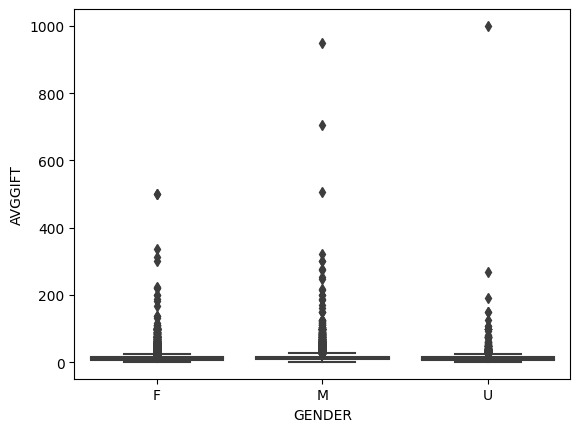

In [19]:
# Let's get a boxplot of AVGGIFT split by gender values
sns.boxplot(x="GENDER", y="AVGGIFT", data=data)
plt.show()

As we can see, the customers of gender "U" are granted with smaller gifts amounts (excepting one outlier). On the other hand, males and females boxplots are quite similar although males have outliers with biggers gifts. 

Now, let's see compare the distributions of AVGGIFT by gender (discarding outliers)

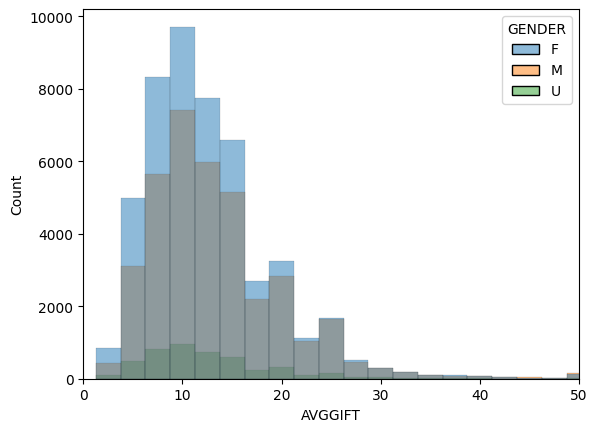

In [20]:
fig, ax = plt.subplots()
sns.histplot(data=data,x="AVGGIFT", hue="GENDER", bins=400, ax=ax)
ax.set_xlim(0,50) # Here we limit the values of the X axis to a maximum of 50.
plt.show()

The distributions are quite similar. The main difference is in the number of customers in every bin but most likely this is could be because of the gender imbalance (remember the output of `data['GENDER'].value_counts()`).

# Column STATE

In [21]:
# Dealing with states
count_states = data['STATE'].value_counts(dropna=False)
count_states

CA    16284
FL     7959
TX     7166
IL     6124
MI     5375
NC     3956
WA     3383
GA     3261
IN     2855
WI     2656
MO     2583
TN     2396
AZ     2278
MN     2081
OR     2045
CO     1929
SC     1660
AL     1627
OK     1553
KY     1542
LA     1533
KS     1233
IA     1214
AR      969
MS      948
NV      923
NM      824
NE      715
UT      546
ID      504
MT      498
HI      423
SD      278
AK      275
WY      267
ND      241
AP       78
NY       70
VA       54
OH       52
PA       36
MD       30
MA       25
NJ       24
CT       20
AA       15
AE       14
ME       11
NH        8
RI        6
VT        6
VI        5
WV        3
GU        3
DE        3
AS        1
DC        1
Name: STATE, dtype: int64

This is a categorical nominal column (there is no implicit order in the values) that can take too many values. If we use a OneHotEncoder to dummify the values we will end up adding a lot of columns in our dataframe. Therefore, we need to group the some states together end with less columns after dummification. Of course, doing so if we train a model to predict AVGGIFT using the new column our model will not be so specific. 

In [22]:
# Checkout underrepressented states.
count_states[count_states < 2500]

TN    2396
AZ    2278
MN    2081
OR    2045
CO    1929
SC    1660
AL    1627
OK    1553
KY    1542
LA    1533
KS    1233
IA    1214
AR     969
MS     948
NV     923
NM     824
NE     715
UT     546
ID     504
MT     498
HI     423
SD     278
AK     275
WY     267
ND     241
AP      78
NY      70
VA      54
OH      52
PA      36
MD      30
MA      25
NJ      24
CT      20
AA      15
AE      14
ME      11
NH       8
RI       6
VT       6
VI       5
WV       3
GU       3
DE       3
AS       1
DC       1
Name: STATE, dtype: int64

Let's create a list of underrepresented states.

In [24]:
small_states = list(count_states[count_states < 2500].index)
small_states

['TN',
 'AZ',
 'MN',
 'OR',
 'CO',
 'SC',
 'AL',
 'OK',
 'KY',
 'LA',
 'KS',
 'IA',
 'AR',
 'MS',
 'NV',
 'NM',
 'NE',
 'UT',
 'ID',
 'MT',
 'HI',
 'SD',
 'AK',
 'WY',
 'ND',
 'AP',
 'NY',
 'VA',
 'OH',
 'PA',
 'MD',
 'MA',
 'NJ',
 'CT',
 'AA',
 'AE',
 'ME',
 'NH',
 'RI',
 'VT',
 'VI',
 'WV',
 'GU',
 'DE',
 'AS',
 'DC']

We could group together the underrepresented states. However, this is not a good strategy on mid-long term because the amount of customers in each state will change overtime. Therefore, this will force us to run this command on an scheduled basis.

A more reasonable approach could be to group the states by regions as shown [here](https://www.infoplease.com/us/states/regions-of-the-us)

In [25]:
# Groupping states in regions
def clean_state(state):

    new_england = ["CT","ME","MA","NH","RI","VT"]
    middle_atlantic = ["DE","MD","NJ","NY","PA"]
    south = ["AL","AR","FL","GA","KY","LA","MS","MO","NC","SC","TN","VA","WV"]
    mid_west = ["IL","IN","IA","KS","MI","MN","NE","ND","OH","SD","WI"]
    south_west = ["AZ","NM","OK","TX"]
    west = ["AK","CA","CO","HI","ID","MT","NV","OR","UT","WA","WY"] 

    if state in new_england:
        return "New_England"
    elif state in middle_atlantic:
        return "Middle_Atlantic"
    elif state in south:
        return "South"
    elif state in mid_west:
        return "Mid_West"
    elif state in south_west:
        return "South_West"
    elif state in west:
        return "West"
    else:
        return "Other"

# Here our cleaning function contains two inputs. Therefore, we can't use .apply directly.
data['STATE'] = data['STATE'].apply(clean_state)
data.rename(columns={"STATE":"REGION"},inplace=True)

In [26]:
data['REGION'].value_counts(dropna=False)

South              28491
West               27077
Mid_West           22824
South_West         11821
Middle_Atlantic      163
Other                117
New_England           76
Name: REGION, dtype: int64

Let's plot these frequencies

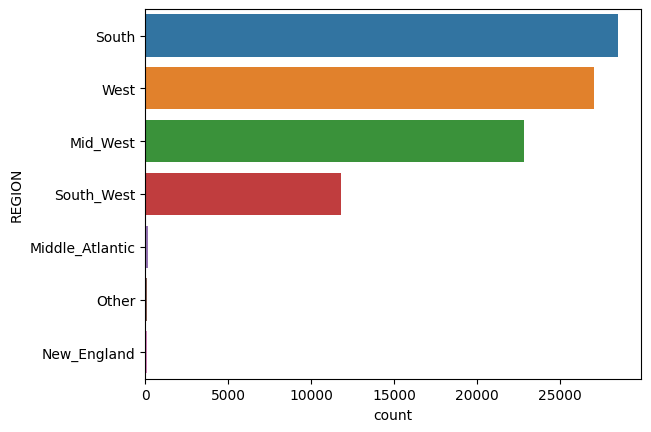

In [27]:
fig, ax = plt.subplots()
sns.countplot(data=data, y="REGION", order= data['REGION'].value_counts(dropna=False).index)
plt.show()

Clearly Middle_Atlantic, New_England and Other are underrepresented regions. It will be worth of doing some research on why:

* is the company too new in these regions, which could explain why the company have so few donnors there?

On the other hand:

* are the customers in these regions reluctant to donate?
* are the donors in these regions "big donnors", worth to keep putting effort in these regions?

These are some examples of very good business intelligence questions to answer for the company. We could check the distribution of donation amount per region. However, the distribution will be more accurate for the most populated regions rather than for the less populated. Then, it could be more interesting to check the donation amount per customer in each region. One way could be to compute the average donation amount. However, remember that the mean is very sensitive to outliers. Therefore, it will be better to get the median amount. Unfortunatelly, we don't have this information in this dataset.


# Column MDMAUD

In [28]:
# Now let's checkout MDMAUD
data['MDMAUD'].value_counts(dropna=False)

XXXX    90290
C1CM       59
L1CM       44
I1CM       34
D2CM       27
C2CM       23
D1CM       19
L2CM       14
C1LM        8
L1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
I1LM        3
D5TM        3
C2MM        3
C5CM        3
C2LM        2
C1MM        1
I2MM        1
I5CM        1
I5MM        1
C5MM        1
L1MM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

Again the values of this columns are heavilly unbalanced, as most of the values are underrepresented. We need to fix this.

# Activity:

Consider the column MDMAUD. Use a user defined function to reduce the number of categories to two:

* XXXX 
* other

In [29]:
def clean_MAUD(x):
    if (x != "XXXX" ):
        return "other"
    else:
        return x

data['MDMAUD'] = data['MDMAUD'].apply(clean_MAUD)
# data['MDMAUD'] = list(map(clean_MAUD,data['MDMAUD']))
#End of Activity 3

# Column IC2

This column is numerical.

In [30]:
# Now IC2
data['IC2'].value_counts()

0       892
288     439
313     376
263     364
315     358
       ... 
1359      1
1245      1
1130      1
1457      1
1345      1
Name: IC2, Length: 1210, dtype: int64

Let's try to cast it as categorical creating bins.
There are multiple ways to bin numerical columns:

* equally spaced bins
* based on frequency
* custom

In [31]:
# Let's try first with four equally spaced bins
ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
data['ic2_category'] = pd.cut(data['IC2'],4,labels=ic2_labels)
data[['IC2','ic2_category']].head(10)

,IC2,ic2_category
0,318,Low
1,1096,High
2,292,Low
3,388,Moderate
4,250,Low
5,410,Moderate
6,284,Low
7,457,Moderate
8,266,Low
9,329,Low


In [32]:
data['ic2_category'].value_counts(dropna=True)

Low          50651
Moderate     36648
High          2766
Very High      504
Name: ic2_category, dtype: int64

Bad job!!! Class imbalance! Now let's create bins of equal frequencies.

In [33]:
ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
data['ic2_category_quartiles'] = pd.qcut(data['IC2'],4,labels=ic2_labels)
data[['IC2','ic2_category_quartiles']].head(10)

,IC2,ic2_category_quartiles
0,318,Moderate
1,1096,Very High
2,292,Moderate
3,388,High
4,250,Low
5,410,High
6,284,Moderate
7,457,High
8,266,Low
9,329,Moderate


In [34]:
data['ic2_category_quartiles'].value_counts(dropna=False)

Low          22745
Moderate     22718
Very High    22594
High         22512
Name: ic2_category_quartiles, dtype: int64

Nicer!!! The reason why the bins are not perfectly equally sized is because `qcut()` is 13 is trying to compensate for repeating values. 

In [35]:
# Another approach
ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
data['ic2_category_userdef'] = pd.cut(data['IC2'],[0,300,500,1000,10000],labels=ic2_labels)
data[['IC2','ic2_category_userdef']].head(10)

,IC2,ic2_category_userdef
0,318,Moderate
1,1096,Very High
2,292,Low
3,388,Moderate
4,250,Low
5,410,Moderate
6,284,Low
7,457,Moderate
8,266,Low
9,329,Moderate


In [36]:
data['ic2_category_userdef'].value_counts()

Moderate     42839
Low          29197
High         16688
Very High      953
Name: ic2_category_userdef, dtype: int64

Not so good

Now let's see if there are differences in the AVGGIFT across ic2_category.

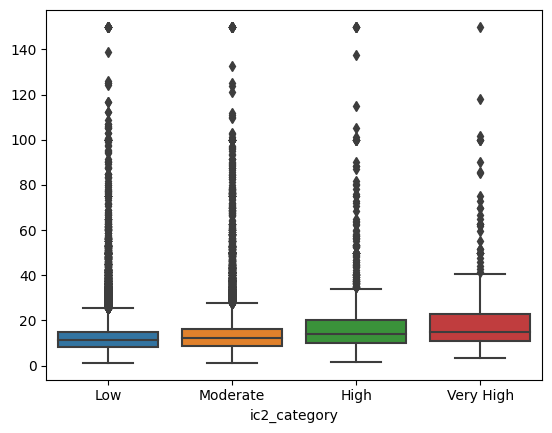

In [37]:
sns.boxplot(x="ic2_category", y=np.where(data.AVGGIFT>150,150,data.AVGGIFT), data=data)
plt.show()

It seems that there are no significant differences.

Let's do the same but considering ic2_category_quartiles.

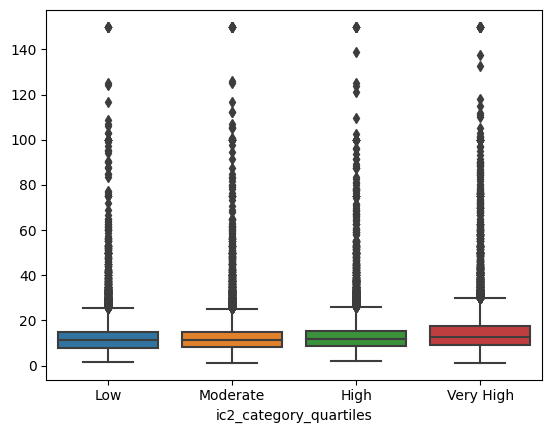

In [38]:
sns.boxplot(x="ic2_category_quartiles", y=np.where(data.AVGGIFT>150,150,data.AVGGIFT), data=data)
plt.show()

According to the previous plot there are no significant differences.

Now let's see if we can find differences splitting by ic2_category_userdef.

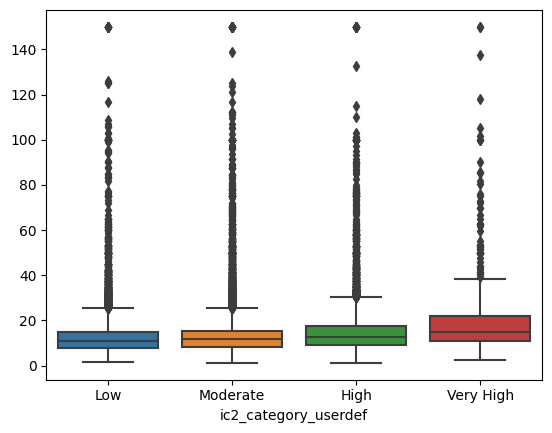

In [39]:
sns.boxplot(x="ic2_category_userdef", y=np.where(data.AVGGIFT>150,150,data.AVGGIFT), data=data)
plt.show()

No big differences.